<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_581/NGC_581_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 3.8MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 44.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831874 sha256=ac4592eb6d3530c02cd180030cb16cffac835029874912ce2142ea15767e79a2
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC581 center

coordinate = coord.SkyCoord.from_name('NGC581')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (23.34583333, 60.65)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 509862821919372288,509862821919372288,47528498,2015.5,23.342139,1.604631,60.649335,1.924199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,74,3,-1.690774,50.439827,0.000000,0.000000e+00,3,False,0.013024,NaN,NaN,0.064572,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.050758,-1.805004,49.391006,46.257850,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001937
1,1635721458409799680,Gaia DR2 509862821917654528,509862821917654528,1136255935,2015.5,23.348224,0.139566,60.647837,0.177842,-0.117917,0.265819,-0.443600,-0.968698,0.239517,-0.755574,0.333036,-0.344465,0.233086,-0.361592,0.023643,-0.111166,-0.073079,-0.014817,-0.328323,0.382878,-0.534408,431,9,430,1,-0.220854,417.933929,0.000000,0.000000e+00,31,False,0.280584,1.500798,0.040730,-0.014264,...,475.126210,6.379536,74.476608,18.069897,1.413960,0,1.256254,0.423300,0.832954,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.053945,-1.805999,49.393524,46.255003,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002456
2,1635721458409799680,Gaia DR2 509862821917646848,509862821917646848,155749623,2015.5,23.344755,1.478474,60.652509,1.737626,5.535791,2.359475,2.346196,3.956021,2.288899,0.605896,3.020984,0.068784,0.569105,-0.225318,-0.318779,-0.304135,-0.396514,-0.257745,0.012941,0.018103,0.083448,102,0,100,2,2.308400,129.681671,3.333368,1.373995e+00,31,False,0.013662,1.700624,0.358144,0.133700,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051509,-1.801664,49.395005,46.259868,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002566
3,1635721458409799680,Gaia DR2 509862821917646976,509862821917646976,324531031,2015.5,23.344351,0.267437,60.652526,0.315644,1.245240,0.500280,2.489087,-2.935483,0.498879,4.157978,0.617648,-0.325415,0.187524,-0.255984,0.024045,-0.270366,-0.010201,-0.091205,-0.220582,0.272263,-0.549402,435,0,433,2,10.904075,831.817810,2.098145,6.998055e+00,31,False,0.069347,1.523048,0.080300,-0.036152,...,359.104309,5.585718,64.289734,18.373869,1.895344,0,1.528061,0.289089,1.238972,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051310,-1.801679,49.394775,46.259987,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002631
4,1635721458409799680,Gaia DR2 509862821919736832,509862821919736832,10975901,2015.5,23.341592,2.689071,60.651851,3.262242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
11,1635721458409799680,Gaia DR2 509862821924859776,509862821924859776,1645770354,2015.5,23.335534,0.061027,60.648177,0.059395,0.523288,0.085655,6.109272,-1.527841,0.095575,-0.257379,0.109516,0.029162,-0.088877,-0.642779,-0.137066,-0.262175,-0.204719,-0.254973,0.042842,0.325021,-0.220278,400,0,397,3,-0.169923,386.600464,0.000000,0.000000,31,False,2.407609,1.526387,0.014693,-0.051014,...,2157.010407,10.861940,198.584259,16.427290,1.302521,0,1.277912,0.526533,0.751379,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.047749,-1.806671,49.386145,46.258577,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005375
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,4982.095380,21.013781,237.087051,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025
15,1635721458409799680,Gaia DR2 509862821924863104,509862821924863104,1432153731,2015.5,23.345440,0.017843,60.643454,0.020889,0.254837,0.030242,8.426500,-1.194531,0.030927,-0.331876,0.040420,-0.287286,0.189279,-0.370151,0.060091,-0.176463,-0.002834,-0.122080,-0.151731,0.204792,-0.509579,433,0,431,2,-2.156400,365.503632,0.000000,0.000000,31,False,18.381409,1.599227,0.005177,-0.016741,...,10914.489157,28.164460,387.527008,14.666911,1.237541,0,0.887876,0.343622,0.544253,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.053308,-1.810545,49.388500,46.252002,100001,5457.886719,5356.600098,5947.649902,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.482077,2.932221,3.615006,9.693254,6.907546,12.478964,https://gea.esac.esa.int/data-server/datalink/...,,0.006549
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,371923.127055,519.192592,716.349060,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,4

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


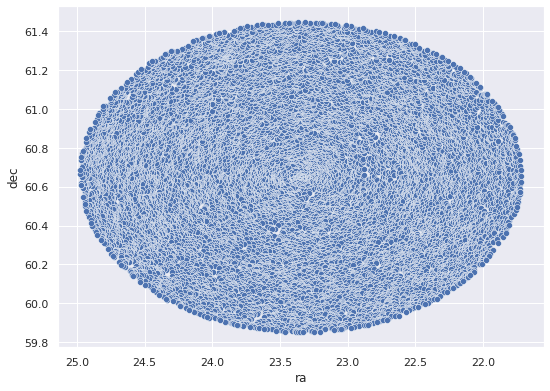

In [8]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [9]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [10]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [11]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [12]:
# help(Vizier)

In [13]:
## saving only NGC 581 data from Cantat

cantat_581 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_581")
cantat_581 = cantat_581[0].to_pandas()
cantat_581

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,23.444496,60.711214,509864230674369664,0.4203,-1.305,-0.111,NaN,17.485600,1.7305,0.1,NGC_581,23.444507,60.711214
1,23.366839,60.571187,509861447535756416,0.3875,-1.400,-0.631,NaN,15.760600,0.8743,0.9,NGC_581,23.366851,60.571189
2,23.139522,60.607261,509850796015034752,0.3732,-0.647,-0.651,NaN,15.411700,1.0211,0.1,NGC_581,23.139527,60.607263
3,23.379967,60.647975,509862169084115200,0.3209,-1.256,-0.624,NaN,17.417801,1.1832,0.3,NGC_581,23.379978,60.647978
4,23.181250,60.669540,509874538595633152,0.3057,-1.849,-0.380,NaN,16.319901,0.8084,0.1,NGC_581,23.181266,60.669541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23.330910,60.679827,509863028083270656,0.3097,-1.386,-0.559,NaN,11.704800,0.3024,0.6,NGC_581,23.330922,60.679829
302,23.256299,60.768428,509876737611440768,0.4223,-0.963,-0.726,NaN,17.515200,1.3165,0.3,NGC_581,23.256307,60.768431
303,23.491549,60.548354,509858286439769344,0.3422,-1.321,-0.518,NaN,14.846400,0.6234,1.0,NGC_581,23.491561,60.548357
304,23.204670,60.602775,509839079344255744,0.3770,-1.424,-0.456,NaN,14.848400,0.6502,1.0,NGC_581,23.204683,60.602777


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_581 = cantat_581.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_581 = cantat_581.loc[:,['source_id', 'PMemb']]


In [16]:
cantat_581.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [17]:
# join the two table on source_id
cantat_581 = all_stars_filtered.join(cantat_581.set_index('source_id'), on='source_id')

In [18]:
cantat_581.isnull().sum()

solution_id                 0
designation                 0
source_id                   0
random_index                0
ref_epoch                   0
                        ...  
lum_percentile_upper     9542
datalink_url                0
epoch_photometry_url        0
dist                        0
PMemb                   20135
Length: 98, dtype: int64

In [19]:
cantat_581.shape

(20350, 98)

In [20]:
cantat_581.dropna(subset=['PMemb']).shape

(215, 98)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


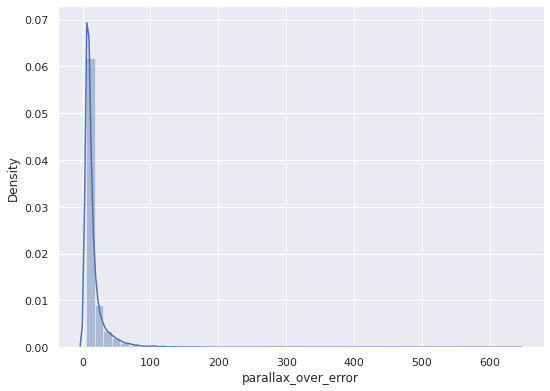

In [21]:
sns.distplot(cantat_581.parallax_over_error)

In [22]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_581 = cantat_581.dropna(subset=['PMemb'])
cantat_581

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,21.013781,237.087051,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,0.8
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,519.192592,716.349060,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,0.9
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,20.622400,290.439758,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,0.5
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,109.613381,674.744446,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,739

In [23]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_581.to_csv('NGC_581_cantat.csv')
# all_stars.to_csv('NGC_581_Gaia_30m.csv')

In [24]:
cantat_581.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,2.150000e+02,2.150000e+02,2.150000e+02,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2.000000,2.000000,215.000000,2.000000,2.00000,2.0,215.000000,215.000000,215.000000,215.000000,210.000000,210.000000,210.000000,210.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,215.000000,215.000000
mean,1.635721e+18,5.098630e+17,8.363227e+08,2015.5,23.336667,0.022998,60.659727,0.026740,0.372550,0.039107,10.990978,-1.396322,0.040266,-0.519720,0.052765,-0.285624,0.151360,-0.435642,0.088401,-0.123915,0.021479,-0.166485,-0.147062,0.213413,-0.513091,444.246512,50.488372,440.562791,3.683721,1.115534,490.776947,0.007561,0.244861,31.0,50.287445,1.605776,0.006530,-0.022389,50.906977,19.195349,...,15.285490,49.660465,2.276763e+05,504.846834,741.589417,14.440893,1.242576,0.027907,0.844606,0.330671,0.513935,-49.753553,0.612721,0.186047,5000.000000,3.75000,0.0,128.046434,-1.795126,49.395711,46.268100,100020.123810,6063.773438,5803.020020,6390.916504,1.115165,0.792132,1.395347,0.561010,0.393693,0.701930,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.072930,0.643256
std,0.000000e+00,8.016851e+12,4.955104e+08,0.0,0.121004,0.009108,0.060804,0.010702,0.052211,0.015584,4.406460,0.219451,0.016231,0.173718,0.021255,0.085082,0.080158,0.059626,0.065184,0.079205,0.071782,0.073748,0.079643,0.066163,0.062253,33.636313,137.153603,34.329553,5.773972,5.591723,230.515442,0.028507,1.187816,0.0,83.344406,0.067232,0.002647,0.023753,3.756701,0.961393,...,1.848998,7.234463,1.899115e+06,3504.926109,383.577057,1.635697,0.130479,0.165091,0.334794,0.188259,0.176995,6.258113,0.414016,2.247073,707.106812,1.06066,0.0,0.060818,0.059311,0.080276,0.064297,195.197174,1153.507812,1083.425415,1228.918579,0.322344,0.324505,0.348212,0.162658,0.162965,0.173831,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044562,0.305462
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,5.011095,-2.238286,0.017891,-1.301381,0.022449,-0.561925,-0.168981,-0.653858,-0.110899,-0.461236,-0.197530,-0.367076,-0.444580,0.011373,-0.635927,264.000000,0.000000,248.000000,0.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


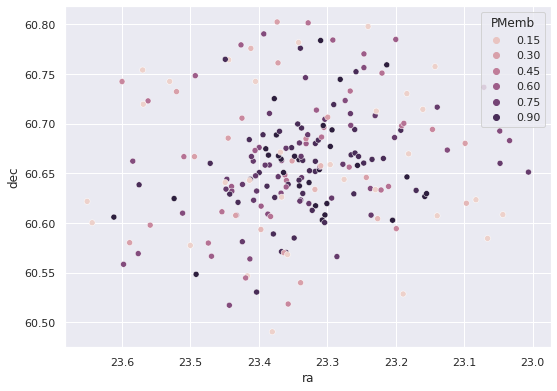

In [25]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_581['ra'], cantat_581['dec'], hue = cantat_581['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [26]:
# import member dataset
member = cantat_581.copy()

In [27]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_581_center'] = distance

In [28]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_581_center
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,237.087051,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,1,0.006020
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,716.349060,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,1,0.007319
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,290.439758,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,1,0.008064
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,674.744446,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0

In [29]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_581_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


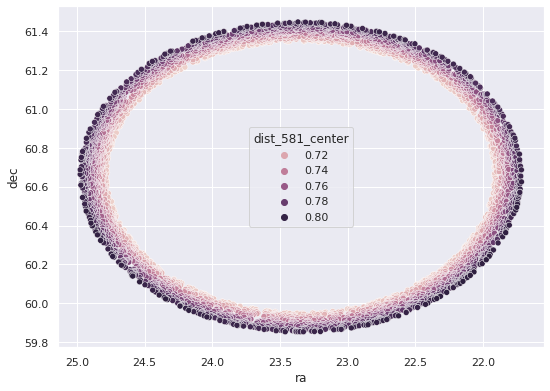

In [30]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_581_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_581_center >= 0.7])
skyplot.invert_xaxis()

In [31]:
non_member = all_stars_filtered[all_stars_filtered['dist_581_center'] >= 0.7].sample(len(member))

In [32]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_581_center,PMemb
145233,1635721458409799680,Gaia DR2 509442671036697344,509442671036697344,825647102,2015.5,22.784726,0.158972,59.987364,0.200309,2.947664,0.294524,10.008232,-8.123132,0.302500,4.381440,0.409979,-0.401752,0.015228,-0.343199,0.040334,0.016496,-0.036026,-0.052496,-0.148911,0.216487,-0.637259,587,9,587,0,230.044052,96553.679688,2.394456,1.659418e+03,31,False,0.165612,1.665122,0.039712,0.004931,...,1078.332153,13.841419,1.234147,0,0.687662,0.237387,0.450275,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,127.882519,-2.502227,48.550134,45.840947,100001,6346.250000,6135.000000,6915.000000,0.086,0.0083,0.173,0.033,0.0039,0.0791,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.718527,0.719623,0
167754,1635721458409799680,Gaia DR2 509394223809047296,509394223809047296,455995202,2015.5,23.489633,0.020236,59.877629,0.023488,0.259796,0.033147,7.837766,-2.349295,0.036895,0.426308,0.051302,-0.439933,0.051227,-0.573065,0.257926,-0.076158,0.211809,-0.332000,0.042620,-0.021128,-0.663654,634,0,632,2,-3.856116,499.547791,0.000000,0.000000e+00,31,False,12.158803,1.552865,0.004850,-0.011799,...,765.394653,15.015228,1.245701,0,1.081240,0.450557,0.630683,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.248998,-2.554430,48.898625,45.562495,100001,5018.953125,4715.520020,5172.975098,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.775656,0.775735,0
162167,1635721458409799680,Gaia DR2 509441537171864576,509441537171864576,1117751146,2015.5,22.856396,0.014671,59.928197,0.017905,0.459500,0.026838,17.121330,-0.376340,0.026392,-1.300361,0.034799,-0.441697,0.141238,-0.453103,0.181775,0.000685,0.095681,-0.151519,-0.140133,0.155763,-0.641130,544,0,544,0,-3.580170,429.217621,0.000000,1.731294e-15,31,False,29.652824,1.591644,0.003679,0.004760,...,1015.923401,14.180912,1.220415,0,0.892194,0.361208,0.530986,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,127.927132,-2.555158,48.549270,45.771753,100001,5658.957520,5473.500000,6027.855469,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.23982,1.97406,2.394174,4.63518,3.959508,5.310852,https://gea.esac.esa.int/data-server/datalink/...,,0.761472,0.762330,0
177243,1635721458409799680,Gaia DR2 509600657117846400,509600657117846400,1088651704,2015.5,24.595004,0.027701,60.143694,0.032641,0.294592,0.053539,5.502389,-1.351157,0.046897,-0.975242,0.066668,-0.455012,0.165605,-0.523097,0.207863,-0.168565,0.155463,-0.244417,-0.163499,0.263693,-0.637567,593,0,590,3,-2.725578,496.038239,0.000000,0.000000e+00,31,False,6.771077,1.564474,0.006954,-0.023836,...,389.951355,15.606915,1.229569,0,1.030571,0.434015,0.596556,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.747660,-2.196929,49.769975,45.503472,100001,5120.613281,4862.910156,5350.000000,NaN,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


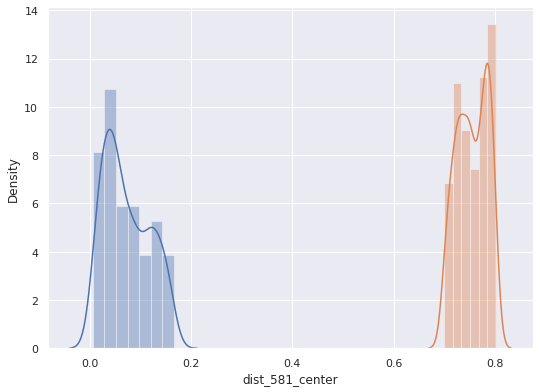

In [33]:
sns.distplot(member['dist_581_center'])
sns.distplot(non_member['dist_581_center'])

In [34]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


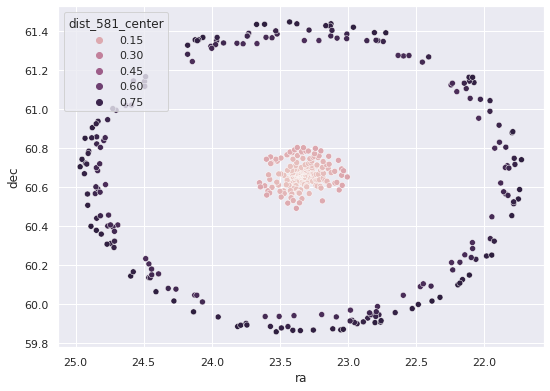

In [35]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_581_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [36]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_581_center
count,4.300000e+02,4.300000e+02,4.300000e+02,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,4.300000e+02,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,4.300000e+02,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,12.000000,12.000000,430.000000,12.000000,12.000000,12.0,430.000000,430.000000,430.000000,430.000000,359.000000,359.000000,359.000000,359.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,430.000000,430.000000,430.000000
mean,1.635721e+18,5.099266e+17,8.525110e+08,2015.5,23.364011,0.043145,60.644990,0.048930,0.691253,0.071541,13.154107,-0.714166,0.076815,-0.995188,0.096628,-0.304886,0.111056,-0.459028,0.117168,-0.076364,0.056815,-0.203985,-0.113427,0.171963,-0.528834,460.093023,37.974419,456.853488,3.239535,4.704332,2403.889160,0.158520,4.462635e+01,31.0,37.886379,1.545291,0.011627,-0.028317,52.590698,18.795349,...,50.890698,1.252537e+05,263.646095,706.969666,14.880996,1.288022,0.053488,1.151169,0.489936,0.661233,-50.293147,1.590795,0.402326,5166.666504,3.291667,0.0,128.061546,-1.805379,49.402487,46.249090,100023.373259,5598.092773,5374.979980,5896.128906,1.083886,0.790645,1.381011,0.542988,0.391850,0.686852,200111.0,4.317649,3.934363,4.643673,135.326294,112.217606,158.435059,0.414045,0.500000,0.414117
std,0.000000e+00,2.978175e+14,4.923915e+08,0.0,0.766693,0.075325,0.385338,0.080928,0.851612,0.124043,12.082595,3.919204,0.136117,2.804725,0.158684,0.114137,0.091036,0.067398,0.091863,0.095586,0.099608,0.101725,0.086714,0.090720,0.086790,72.781153,122.036629,72.805546,5.294217,29.016172,27208.117188,0.735569,6.830955e+02,0.0,73.634735,0.107402,0.018867,0.031470,8.230361,1.315136,...,8.698239,1.346146e+06,2487.438280,452.275146,1.679576,0.153522,0.225267,0.511062,0.285853,0.251668,36.163751,1.519072,2.598815,651.338928,0.450168,0.0,0.374383,0.387023,0.555510,0.377038,210.482420,1137.447754,1065.941528,1208.451904,0.423666,0.407275,0.508928,0.215447,0.205095,0.246510,0.0,19.328228,17.645931,20.728861,1275.776978,1055.486328,1496.747681,0.343599,0.500582,0.343674
min,1.635721e+18,5.093942e+17,2.885440e+05,2015.5,21.728781,0.009833,59.857855,0.011431,0.159630,0.016720,5.011095,-14.798171,0.017891,-22.180068,0.022449,-0.561925,-0.244204,-0.653858,-0.234142,-0.461236,-0.407191,-0.543797,-0.444580,-0.092659,-0.721978,16

In [37]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist                        -0.993929
dist_581_center             -0.993927
bp_rp                       -0.600554
g_rp                        -0.585970
bp_g                        -0.557806
                               ...   
teff_percentile_lower        0.477391
teff_val                     0.486719
teff_percentile_upper        0.486757
astrometric_pseudo_colour    0.563825
PMemb                        1.000000
Name: PMemb, Length: 89, dtype: float64

In [38]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [39]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,430.000000,430.000000,430.000000
mean,0.691253,-0.714166,-0.995188
std,0.851612,3.919204,2.804726
min,0.159630,-14.798170,-22.180069
25%,0.346064,-1.530082,-0.951035
50%,0.401561,-1.373785,-0.537460
75%,0.673425,-0.759257,-0.380491
max,8.107637,24.674461,7.611651


In [40]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


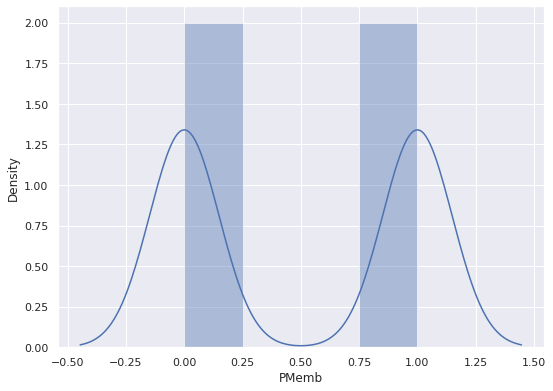

In [41]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [42]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

215

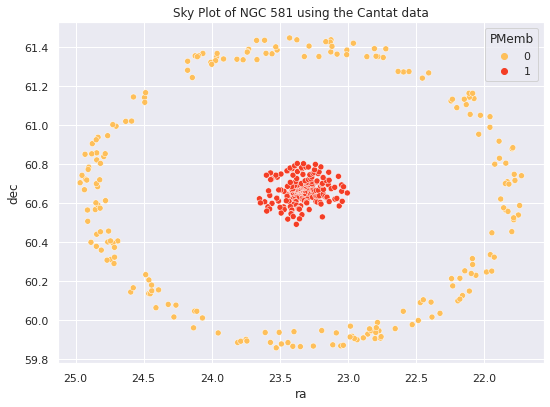

In [43]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 581 using the Cantat data')
plt.show()

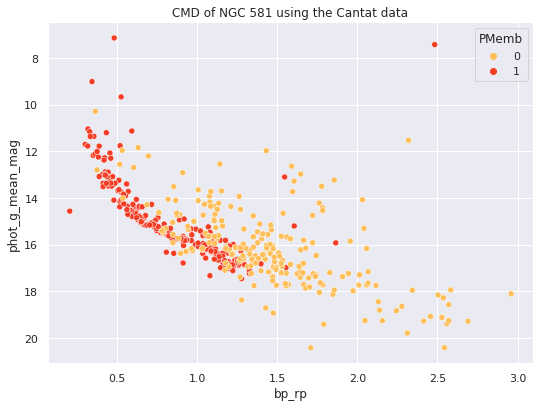

In [44]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of NGC 581 using the Cantat data')
plt.show()

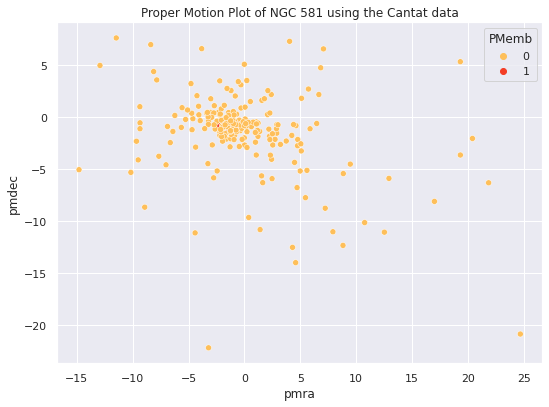

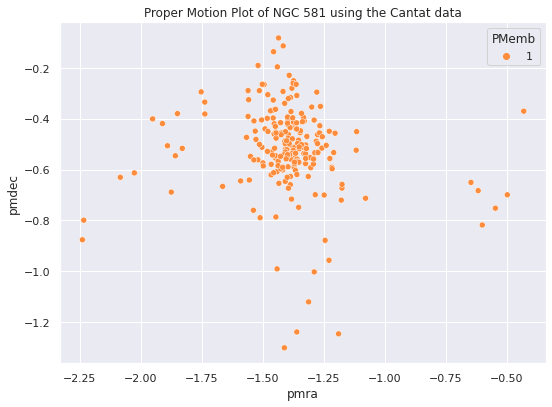

In [45]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 581 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of NGC 581 using the Cantat data')
plt.show()

In [46]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.363580
pmra        0.324358
pmdec       0.312062
dtype: float64

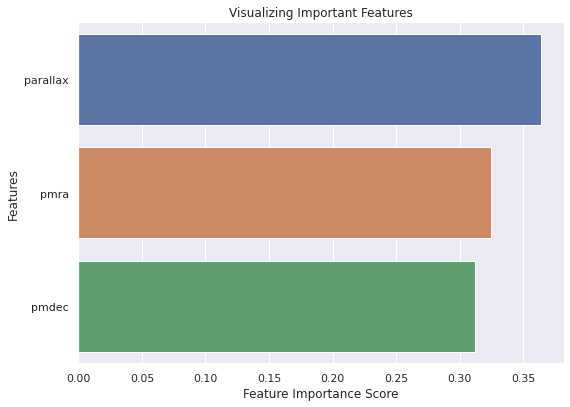

In [48]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [49]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [93]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [94]:
# train the model using only training subset
rfc.fit(train_features, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfc.predict(test_features)
rfc.score(test_features, test_targets)

0.9224806201550387

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

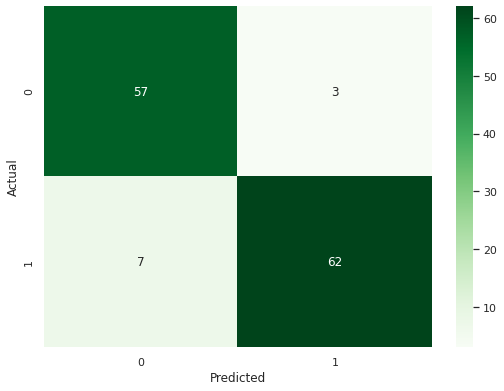

Accuracy Score: 0.92
Precision score: 0.95
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        60
           1       0.95      0.90      0.93        69

    accuracy                           0.92       129
   macro avg       0.92      0.92      0.92       129
weighted avg       0.92      0.92      0.92       129



In [97]:
sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Accuracy Score: %.2f' % accuracy_score(test_targets, test_predict))
print('Precision score: %.2f' % precision_score(test_targets, test_predict))
print("Classification Report: \n", classification_report(test_targets, test_predict))


In [55]:
# plot Predicted vs True Targets in Test Subset

#sns.scatterplot(test_predict, test_targets)
#plt.title('Predicted vs True Targets in Test Subset')
#plt.ylabel('True Targets')
#plt.xlabel('Predicted Targets')
#plt.show()

In [56]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [57]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []
precision_rate = []

rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  precision = 0
  for iter in range(10):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfc.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfc.predict(test_features)
    accuracy += rfc.score(test_features, test_targets)
    precision += precision_score(test_targets, test_predict)

  accuracy_rate.append(accuracy/10)
  precision_rate.append(precision/10)

print(accuracy_rate)

[0.8534313725490195, 0.8922279792746112, 0.9016438356164382, 0.9055393586005831, 0.9189440993788821, 0.9189368770764121, 0.9222222222222223, 0.9275193798449612, 0.9262711864406779, 0.9274418604651163, 0.9284974093264248, 0.9220930232558139, 0.9306666666666665, 0.92015503875969, 0.9271028037383179, 0.9325581395348838, 0.925, 0.9404761904761905, 0.9190476190476191]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


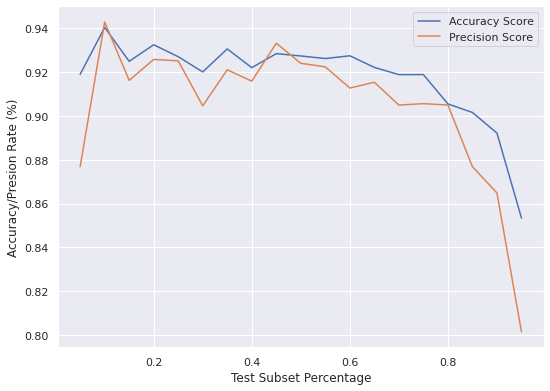

In [58]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate, label = 'Accuracy Score')
sns.lineplot(test_ratio, precision_rate, label= 'Precision Score')
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy/Presion Rate (%)')
plt.legend()
plt.show()

### Prediction of PMemb for the new stars

In [59]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_581_center
count,2.035000e+04,2.035000e+04,2.035000e+04,20350.0,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.000000,20350.0,20350.000000,20349.000000,20349.000000,20350.000000,20350.000000,20350.000000,...,20186.000000,20350.000000,2.018500e+04,20185.000000,20185.000000,20185.000000,20185.000000,20350.000000,20185.000000,20186.000000,20185.000000,823.000000,823.000000,20350.000000,823.000000,823.000000,823.000000,20350.000000,20350.000000,20350.000000,20350.000000,14896.000000,14896.000000,14896.000000,14896.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,10808.0,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,10808.000000,20350.000000,20350.000000
mean,1.635721e+18,5.099913e+17,8.482331e+08,2015.5,23.361733,0.050793,60.651477,0.057766,0.899427,0.083552,15.685029,0.484247,0.091549,-1.428569,0.115999,-0.314101,0.061303,-0.470588,0.135927,-0.036758,0.080314,-0.226848,-0.082797,0.142716,-0.540189,466.025012,21.377199,463.190565,2.834447,3.162959,1058.058228,0.186814,14.472082,31.0,25.082678,1.488013,0.013576,-0.035311,53.176953,18.446929,...,16.712465,51.461523,3.944501e+04,58.406398,659.534424,15.273549,1.321971,0.073415,1.439008,0.647078,0.791861,-40.687176,1.535712,0.572383,5148.602539,3.391859,-0.046173,128.059388,-1.798889,49.406204,46.255269,100040.275107,4941.272461,4758.352539,5213.967773,1.101637,0.831817,1.426728,0.547113,0.409512,0.712593,200111.0,3.356272,3.013560,3.619475,19.045527,15.761189,22.329798,0.526736,0.526752
std,0.000000e+00,3.526908e+14,4.861880e+08,0.0,0.810686,0.076019,0.395752,0.086258,1.107070,0.122679,20.899277,8.433315,0.143926,5.081577,0.176473,0.123148,0.094761,0.076955,0.103310,0.090619,0.106811,0.116158,0.098378,0.095515,0.097996,72.523596,96.403526,72.319517,4.286460,17.822317,9258.287109,0.664214,216.944963,0.0,58.479572,0.097180,0.019165,0.031681,8.224454,1.331456,...,1.839321,9.726218,5.226163e+05,786.311681,475.642120,1.564045,0.169656,0.280259,0.490757,0.293824,0.226844,36.156365,1.932802,2.980195,653.007019,0.571393,0.258071,0.396147,0.397149,0.579581,0.392286,277.297363,765.632446,724.127075,821.201233,0.507726,0.474314,0.573303,0.256373,0.236625,0.292074,0.0,6.894217,6.268516,7.407356,261.806854,220.150970,303.755249,0.192648,0.192677
min,1.635721e+18,5.093905e+17,5.827000e+03,2015.5,21.715170,0.008443,59.852482,0.009909,0.099383,0.014476,5.0001

In [60]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [61]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [62]:
# train the model again using all the features and targets of the previous dataset
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfc.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

1840

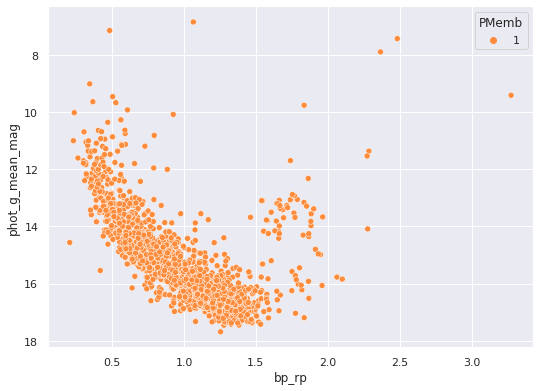

In [64]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

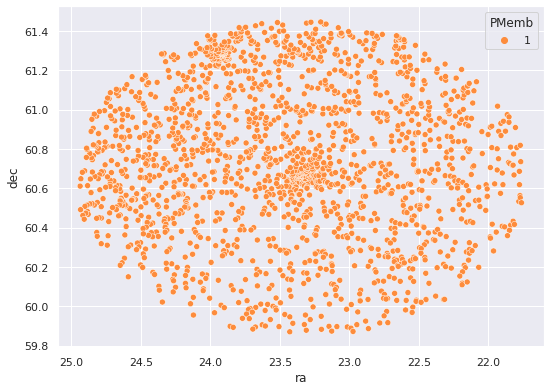

In [65]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

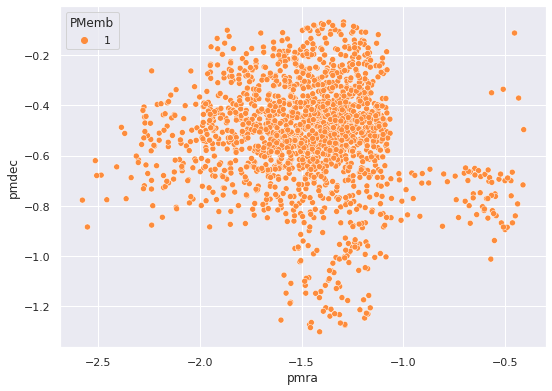

In [66]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [67]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

1840

In [68]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_581_center,PMemb
count,1.840000e+03,1.840000e+03,1.840000e+03,1840.0,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.0,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,...,1840.000000,1.836000e+03,1836.000000,1836.000000,1836.000000,1836.000000,1840.000000,1836.000000,1836.000000,1836.000000,32.000000,32.000000,1840.000000,32.00000,32.000000,32.000000,1840.000000,1840.000000,1840.000000,1840.000000,1770.000000,1770.000000,1770.000000,1770.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,1193.0,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1840.000000,1840.000000,1840.0
mean,1.635721e+18,5.099884e+17,8.689927e+08,2015.5,23.449754,0.024813,60.741991,0.028267,0.358898,0.041026,10.086370,-1.463092,0.044232,-0.520650,0.056651,-0.321683,0.076991,-0.468944,0.148272,-0.046610,0.093094,-0.230466,-0.093340,0.152751,-0.543200,456.613043,30.217935,453.672826,2.940217,0.308665,475.779694,0.013683,0.458382,31.0,36.794514,1.578703,0.006854,-0.034136,52.130978,18.629348,...,51.511413,7.780216e+04,132.101840,751.158447,14.747021,1.245824,0.029891,0.978809,0.402525,0.576283,-48.304519,1.326706,0.264130,5093.75000,3.406250,-0.007812,128.087014,-1.702882,49.528020,46.309329,100024.773446,5632.514160,5401.009766,5940.333984,1.211335,0.890660,1.531024,0.606847,0.441109,0.767140,200111.0,4.011205,3.632903,4.350310,68.740379,57.355198,80.125565,0.494957,0.494779,1.0
std,0.000000e+00,3.176744e+14,4.853990e+08,0.0,0.762821,0.009971,0.380638,0.011258,0.055657,0.016218,4.099948,0.318394,0.017929,0.209869,0.022497,0.102501,0.088067,0.072658,0.091549,0.088126,0.097557,0.103605,0.092319,0.091180,0.079849,65.166748,111.162676,65.044156,4.489818,5.021595,235.278336,0.052814,3.426573,0.0,68.675468,0.067139,0.002801,0.032379,7.365005,1.139344,...,7.531401,9.574213e+05,1532.659774,384.366608,1.353767,0.069142,0.179656,0.335952,0.180291,0.166524,21.398938,1.753911,2.200355,556.30542,0.653002,0.044194,0.369616,0.384140,0.559049,0.367263,216.764828,991.267883,926.783203,1070.901245,0.423421,0.418418,0.446169,0.213246,0.208763,0.228374,0.0,12.815834,11.908610,13.634127,753.324463,631.718872,875.407715,0.224427,0.224287,0.0
min,1.635721e+18,5.093935e+17,2.879400e+04,2015.5,21.760214,0.009633,59.870623,0.010896,0.258687,0.015332,5.000334,-2.579222,0.016986,-1.301381,0.021665,-0.803220,-0.243342,-0.818193,-0.120929,-0.461236,-0.391485,-0.6

In [69]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_581_center
count,2.150000e+02,2.150000e+02,2.150000e+02,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2.000000,2.000000,215.000000,2.000000,2.00000,2.0,215.000000,215.000000,215.000000,215.000000,210.000000,210.000000,210.000000,210.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,215.000000,215.0,215.000000
mean,1.635721e+18,5.098630e+17,8.363227e+08,2015.5,23.336667,0.022998,60.659727,0.026740,0.372550,0.039107,10.990978,-1.396322,0.040266,-0.519720,0.052765,-0.285624,0.151360,-0.435642,0.088401,-0.123915,0.021479,-0.166485,-0.147062,0.213413,-0.513091,444.246512,50.488372,440.562791,3.683721,1.115534,490.776947,0.007561,0.244861,31.0,50.287445,1.605776,0.006530,-0.022389,50.906977,19.195349,...,49.660465,2.276763e+05,504.846834,741.589417,14.440893,1.242576,0.027907,0.844606,0.330671,0.513935,-49.753553,0.612721,0.186047,5000.000000,3.75000,0.0,128.046434,-1.795126,49.395711,46.268100,100020.123810,6063.773438,5803.020020,6390.916504,1.115165,0.792132,1.395347,0.561010,0.393693,0.701930,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.072930,1.0,0.072927
std,0.000000e+00,8.016851e+12,4.955104e+08,0.0,0.121004,0.009108,0.060804,0.010702,0.052211,0.015584,4.406460,0.219451,0.016231,0.173718,0.021255,0.085082,0.080158,0.059626,0.065184,0.079205,0.071782,0.073748,0.079643,0.066163,0.062253,33.636313,137.153603,34.329553,5.773972,5.591723,230.515442,0.028507,1.187816,0.0,83.344406,0.067232,0.002647,0.023753,3.756701,0.961393,...,7.234463,1.899115e+06,3504.926109,383.577057,1.635697,0.130479,0.165091,0.334794,0.188259,0.176995,6.258113,0.414016,2.247073,707.106812,1.06066,0.0,0.060818,0.059311,0.080276,0.064297,195.197174,1153.507812,1083.425415,1228.918579,0.322344,0.324505,0.348212,0.162658,0.162965,0.173831,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044562,0.0,0.044558
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,5.011095,-2.238286,0.017891,-1.301381,0.022449,-0.561925,-0.168981,-0.653858,-0.110899,-0.461236,-0.197530,-0.367076,-0.444580,0.011373,-0.635927,264.000000,0.000000,248.000000,0.000000,-5.932523,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


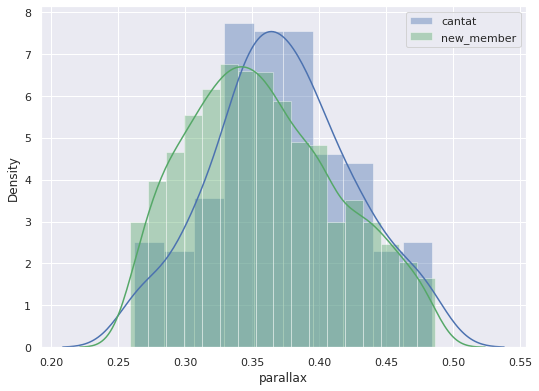

In [70]:
sns.distplot(member['parallax'], color = 'b', label = 'cantat', kde=True)
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', kde=True)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


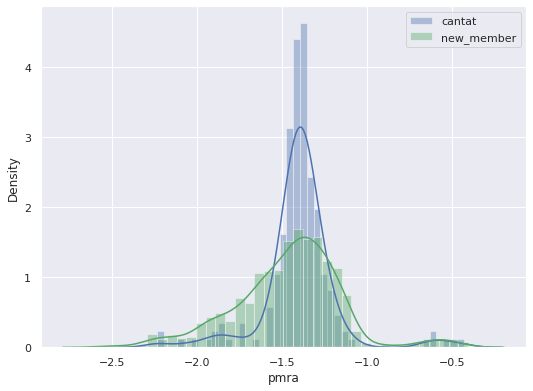

In [71]:
sns.distplot(member['pmra'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


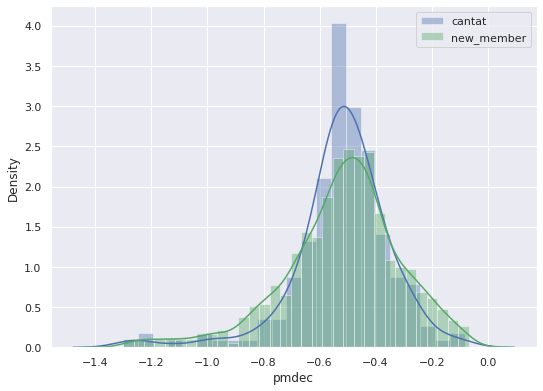

In [72]:
sns.distplot(member['pmdec'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

In [73]:
# saving the files as csv
# all_stars.to_csv('gaia_581_membership_prob.csv')

potentialMember.to_csv('NGC_581_membership_prob.csv')


### Comparing the new and old probable members

In [74]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [75]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_581_center,PMemb,dataset
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,0.006020,1,New_member
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,0.007319,1,New_member
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,0.008064,1,New_member
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350,0.3146,0.728

In [76]:
concatenated.dataset.value_counts()

New_member    1840
Old_member     215
Name: dataset, dtype: int64

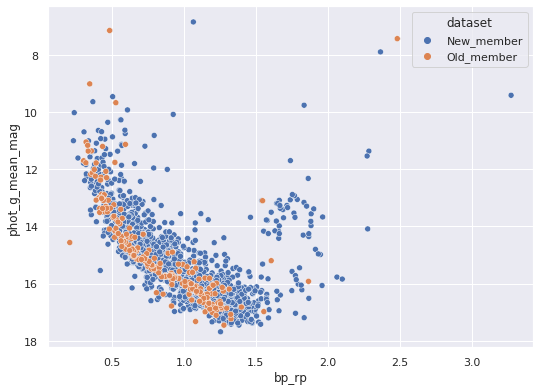

In [77]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

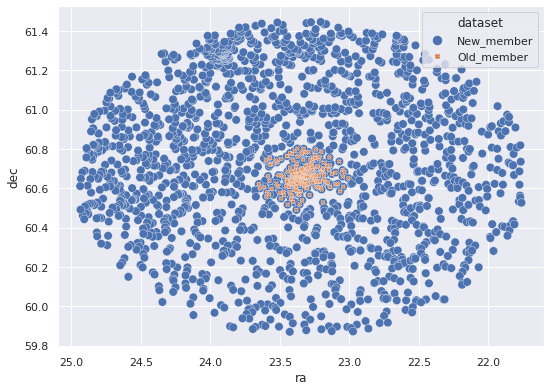

In [78]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

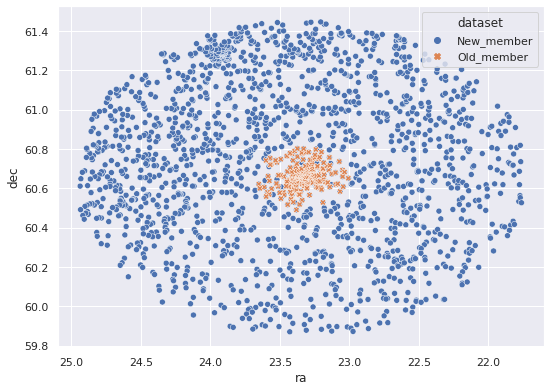

In [79]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

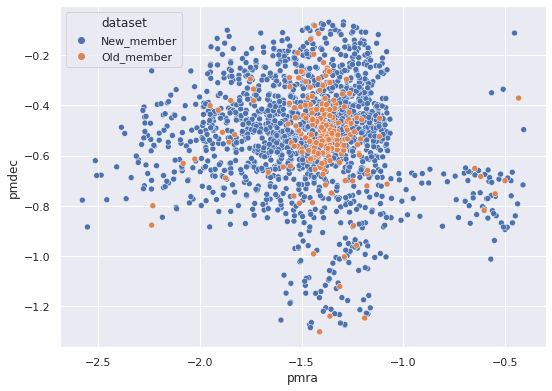

In [98]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset')

In [81]:
# pd_prof.ProfileReport(potentialMember)

In [82]:
#files.download('NGC_581_cantat.csv')

#files.download('NGC_581_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


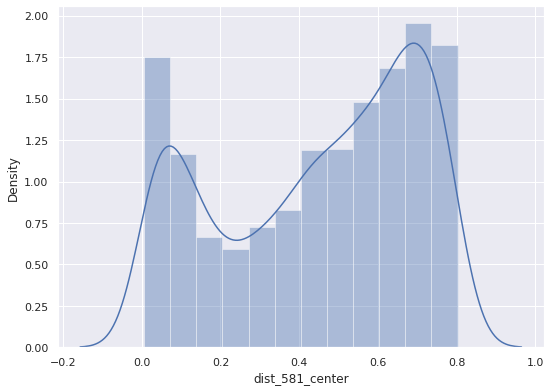

In [83]:
sns.distplot(concatenated['dist_581_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


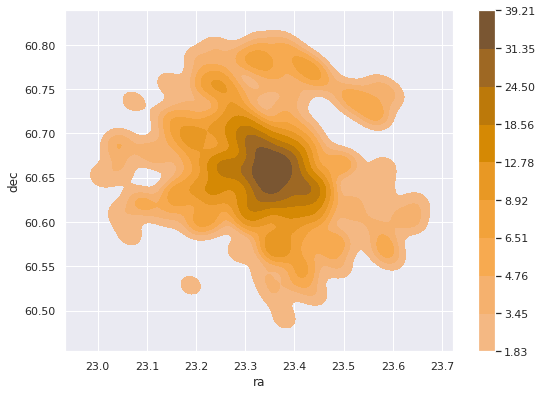

In [100]:
sns.kdeplot('ra', 'dec', data = member, shade=True, color = 'orange', bw = 0.20, cbar=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


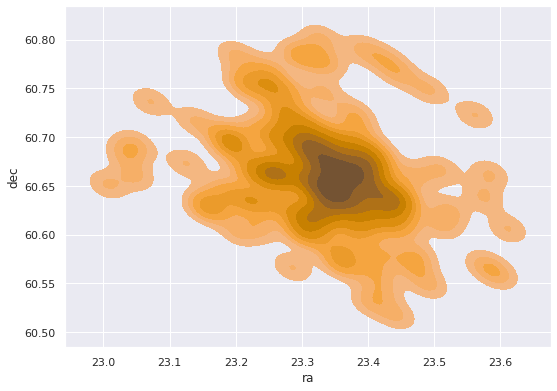

In [85]:
sns.kdeplot('ra', 'dec', data = cantat_581[cantat_581['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [86]:
len(cantat_581[cantat_581['PMemb'] >= 0.5])

159

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


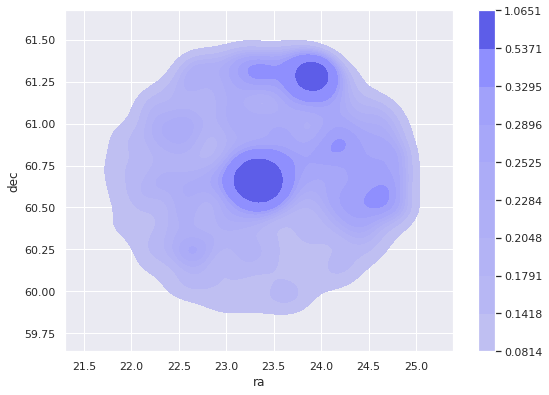

In [101]:
sns.kdeplot('ra', 'dec', data = potentialMember, shade=True, color = 'blue', bw = 0.20, cbar=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


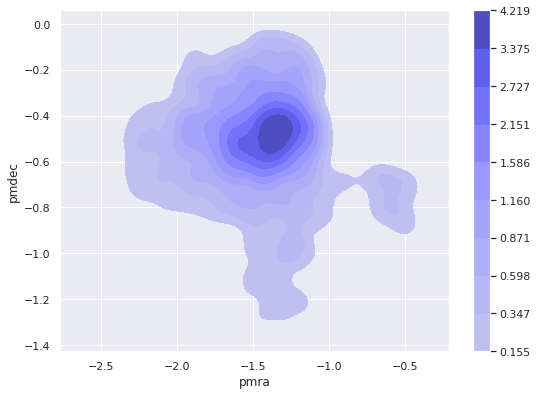

In [111]:
sns.kdeplot('pmra', 'pmdec', data = potentialMember, shade=True, color = 'blue', bw = 0.20, cbar=True)


array([-15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,
        -1.5,  -1. ,  -0.5])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


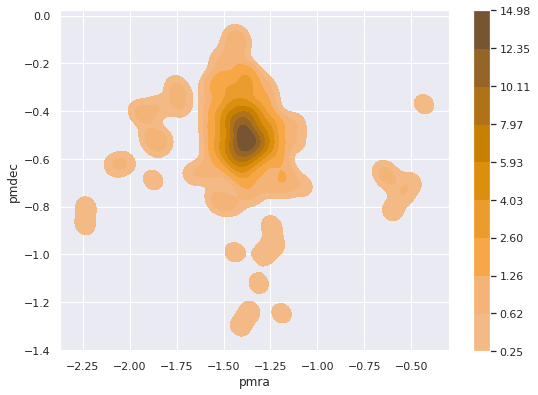

In [103]:
sns.kdeplot('pmra', 'pmdec', data = member, shade=True, color = 'orange', bw = 0.20, cbar=True)

In [90]:
potentialMember['radial_velocity'].dropna()

77       -45.328398
972      -54.178707
12365    -52.778705
19889    -67.243972
21046    -58.052709
27820    -64.727277
28782    -10.611586
34351    -33.897322
39935    -55.096773
42894    -46.373903
50374    -30.650323
63025    -90.890798
65385    -51.224299
67952     -8.613574
69976    -64.480819
74411    -42.634813
75915     15.866390
85627    -64.532899
86725    -33.950215
100820   -77.111405
113106   -48.776168
116272   -45.426634
132049   -44.582301
135842   -43.539902
142451   -52.419485
148777   -54.340320
148888   -74.225553
153526   -84.019822
161430   -36.704087
162052   -41.389572
165186   -41.929655
177547   -41.879006
Name: radial_velocity, dtype: float64

In [91]:
member['radial_velocity'].dropna()

77    -45.328398
972   -54.178707
Name: radial_velocity, dtype: float64

In [92]:
member['radial_velocity_error'].dropna()

77     0.319967
972    0.905474
Name: radial_velocity_error, dtype: float64